# Job Watch Analytics

##### INIT (Run Once)

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

##### Set Variables

In [9]:
result_dir = 'results/'
data_headers = ['Date', 'Time', 'Keyword', 'Location', 'Count']

keywords = ['angular', 'javascript', 'node', 'python', 'react', 'sql']
location = 'austin'

plt_style = 'seaborn-darkgrid'

##### Load All Result Data

In [10]:
# Read all CSV Files
def read_all_results():
    datasets = []
    filenames = os.listdir(result_dir)

    for file in filenames:
        datasets.append(pd.read_csv(f'{result_dir}{file}', header=None))

    return datasets

# Create DataFrame
df = pd.concat(read_all_results(), ignore_index=True)
df.columns = data_headers
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Time,Keyword,Location,Count
0,2021-12-07,09:30:38.258867,python,austin,113
1,2021-12-08,12:04:50.071836,python,austin,156
2,2021-12-09,16:58:44.075794,python,austin,192
3,2021-12-10,11:23:11.230411,python,austin,126
4,2021-12-11,09:26:01.482395,python,austin,79


##### Sorted Data

In [11]:
def sort_data(sort_by, ascending = True):
    return df.sort_values(by=sort_by, ascending=ascending, ignore_index=True)


sort_data('Count').head()

,Date,Time,Keyword,Location,Count
0,2021-12-11,09:26:26.728370,typescript,austin,9
1,2021-12-14,18:09:20.044557,typescript,austin,10
2,2021-12-10,12:48:37.301895,typescript,austin,13
3,2021-12-07,09:31:30.935813,node,austin,14
4,2021-12-11,09:25:55.790359,node,austin,15


##### Plot All Data At Location

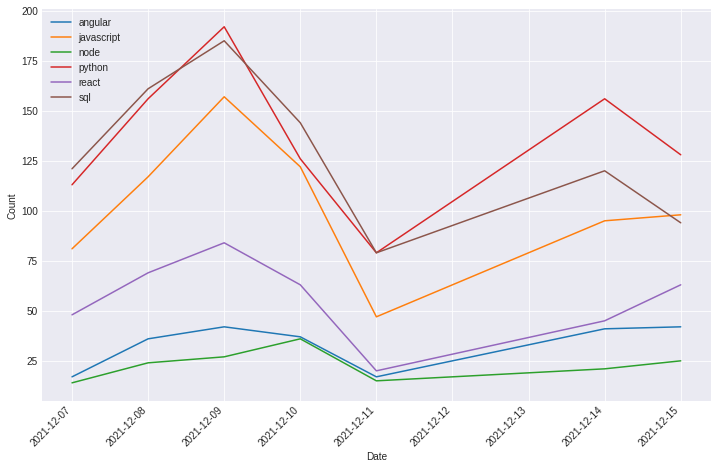

In [25]:
def plot_all_data(x_axis, y_axis, args = None):
    # Initialize plot
    fig, ax = plt.subplots()
    fig.autofmt_xdate(rotation=45)
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)

    ## Initialize figure
    if 'size_x' in args and 'size_y' in args:
        fig.set_size_inches(args['size_x'], args['size_y'])

    if 'dpi' in args:
        fig.set_dpi(args['dpi'])

    # Plot data
    for keyword in keywords:
        data = df[df['Keyword'] == keyword]
        ax.plot(data[x_axis], data[y_axis], label=keyword)
        
    ax.legend(loc="upper left")
    
plt.style.use(plt_style)

plot_all_data('Date', 'Count', {'size_x': 12, 'size_y': 8})